In [70]:
import pandas as pd
df=pd.read_csv('train_house_price.csv')
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [71]:
df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


In [72]:
import numpy as np

In [73]:
df['lot_size'] = df.apply(
    lambda row: row['lot_size'] * 43560 if row['lot_size_units'] == 'acre' else row['lot_size'],
    axis=1
)

In [74]:
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [75]:
df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [76]:
import seaborn as sns

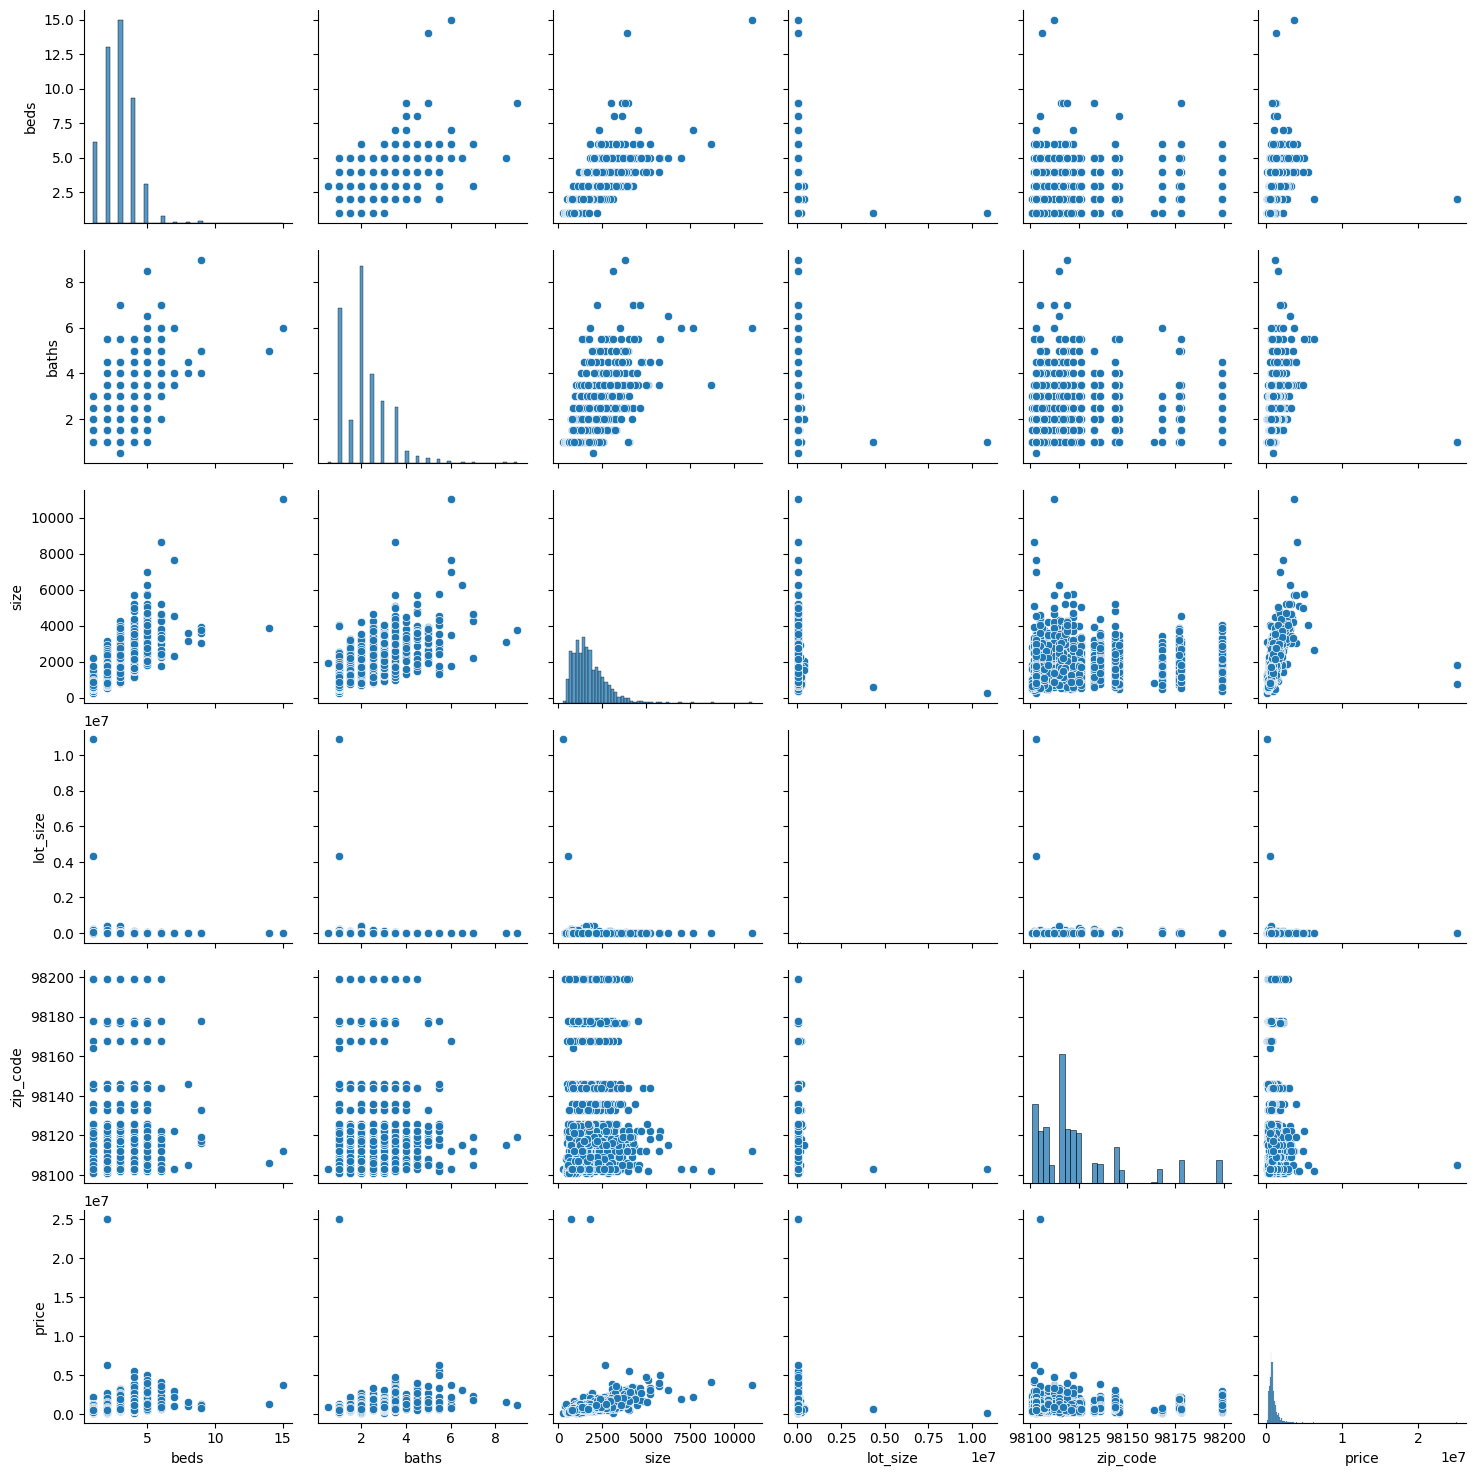

In [77]:
sns.pairplot(df)

In [78]:
df['lot_size'].fillna(df['lot_size'].median(), inplace=True)

In [79]:
df.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size            0
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [80]:
df.drop(columns=['lot_size_units','size_units'],axis=1,inplace=True)

In [81]:
df.isnull().sum()

beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64

In [82]:
df.head()

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
4,2,2.0,1042.0,5000.0,98102,950000.0


In [83]:
df.drop('beds',axis=1,inplace=True)

In [84]:
df.head()

,baths,size,lot_size,zip_code,price
0,2.5,2590.0,6000.0,98144,795000.0
1,2.0,2240.0,13503.6,98106,915000.0
2,3.0,2040.0,3783.0,98107,950000.0
3,3.0,3800.0,5175.0,98199,1950000.0
4,2.0,1042.0,5000.0,98102,950000.0


In [85]:
df.corr()

,baths,size,lot_size,zip_code,price
baths,1.000000,0.667655,-0.038250,-0.002679,0.317325
size,0.667655,1.000000,-0.047260,0.070557,0.444140
lot_size,-0.038250,-0.047260,1.000000,-0.023656,-0.024796
zip_code,-0.002679,0.070557,-0.023656,1.000000,-0.047189
price,0.317325,0.444140,-0.024796,-0.047189,1.000000


In [86]:
df.drop('size',axis=1,inplace=True)

In [87]:
x=df.drop('price',axis=1)

In [88]:
y=df['price']

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [90]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit_transform(x_train)
s.transform(x_test)

array([[ 0.83919015, -0.03366347, -0.24719543],
       [ 1.33726619, -0.05706211,  0.87613263],
       [ 0.34111411, -0.02765488,  0.40087845],
       ...,
       [ 0.83919015, -0.05102617, -0.29040035],
       [-1.15311401, -0.03714968, -0.29040035],
       [ 0.34111411, -0.04405375, -0.07437572]])

In [91]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred=lr.predict(x_test)

In [93]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_pred,y_test))

-17.218363230377555


In [94]:
import seaborn as sns

<Axes: >

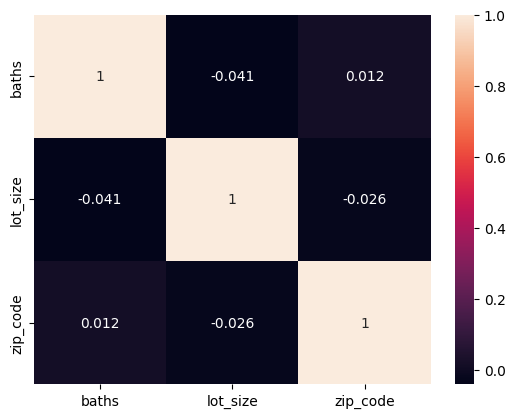

In [95]:
sns.heatmap(x_train.corr(),annot=True)

In [96]:
x_train.corr()

,baths,lot_size,zip_code
baths,1.000000,-0.041068,0.012435
lot_size,-0.041068,1.000000,-0.026192
zip_code,0.012435,-0.026192,1.000000


In [97]:
x_test.drop('baths',axis=1,inplace=True)

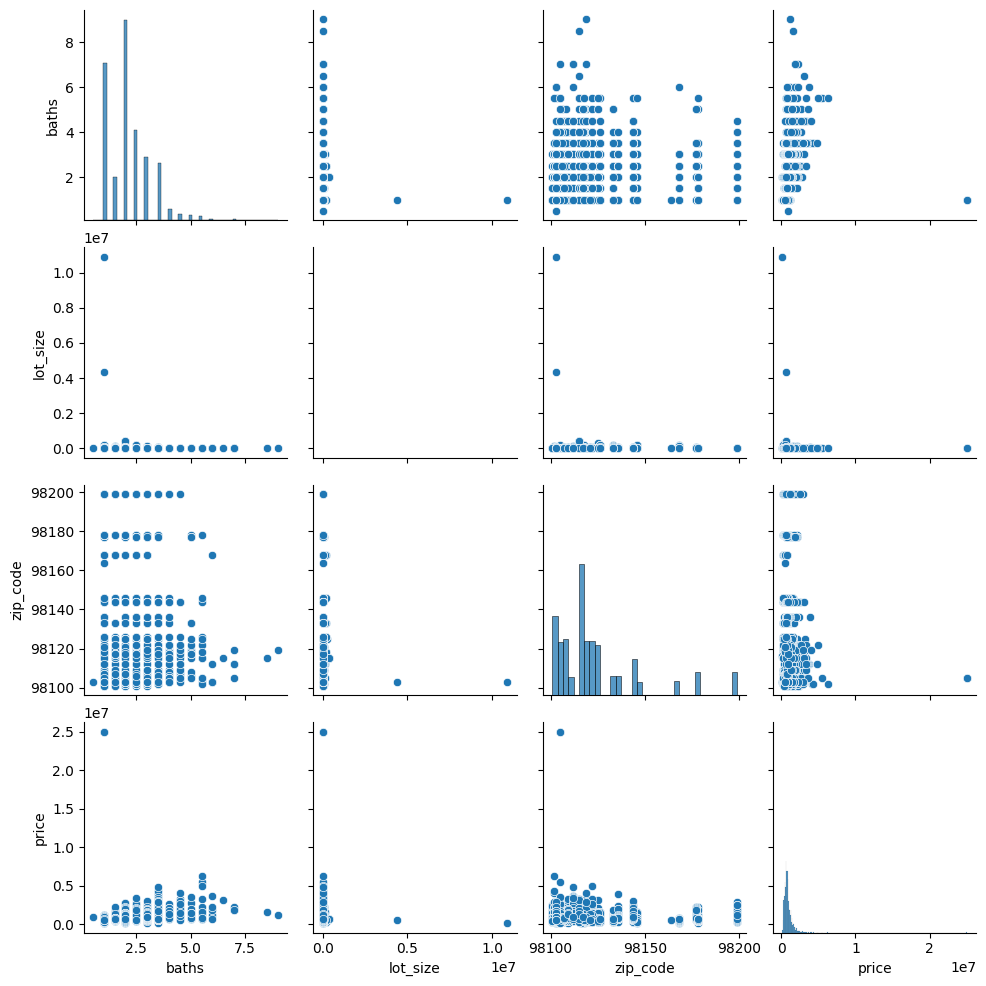

In [98]:
sns.pairplot(df)

In [99]:
sns.histplot(df['beds'],kde=True)

KeyError: 'beds'

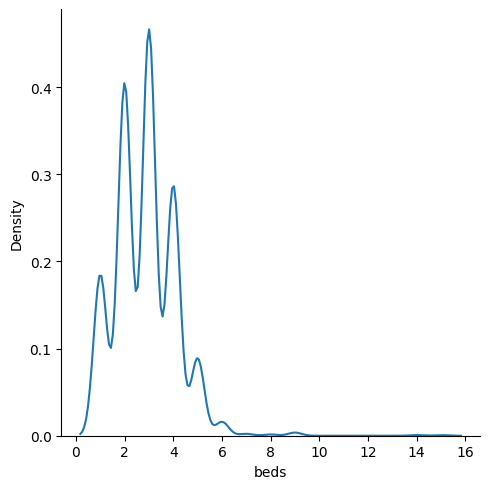

In [ ]:
sns.displot(df['beds'],kind="kde")

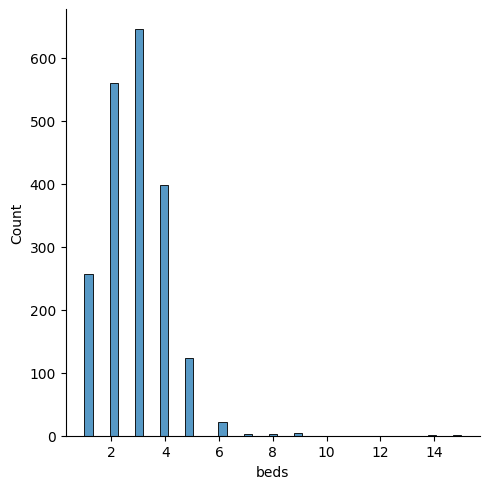

In [ ]:
sns.displot(df['beds'])

In [ ]:
st=StandardScaler()

In [ ]:
st.fit_transform(x_train)

array([[ 0.91247926,  1.75524579, -0.04104604,  0.53049323],
       [-0.66660455, -1.02241248, -0.05109453, -0.8952693 ],
       [-1.45614646, -1.33247666, -0.04446389,  0.96254248],
       ...,
       [ 0.91247926,  0.68940018, -0.04446389, -0.3768102 ],
       [-0.66660455, -0.16112309, -0.01539981,  2.34510009],
       [ 0.12293736, -0.06422804, -0.05846001, -0.7224496 ]])

In [ ]:
st.transform(x_test)

In [ ]:
E:\MachineLearning_full\house_train.ipynb